In [1]:
#constellate: setup
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

This tests whether we can grab the global state and keep it inside function calls.

Testing if stdout works when running in Constellate


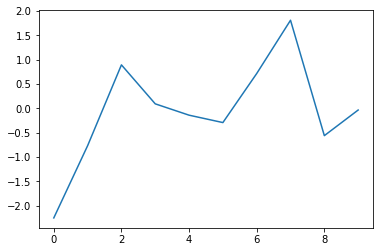

In [2]:
def f():
    def g():
        q = stats.norm.rvs(size=10)
        return q

    r = stats.norm.rvs(size=10)
    return stats.norm.rvs(size=10)

print('Testing if stdout works when running in Constellate')
plt.plot(np.arange(10), f());

In [12]:
#constellate: setup

def prop(x):
    print(globals().keys())
    return stats.norm(loc=x, scale=1).rvs()

This tests how setup works with lambdas and whether they can appropriately use namespaces.

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', 'sys', '_i', '_ii', '_iii', '_i1', 'np', 'stats', 'plt', 'site', 'os', '__vsc_ipynb_file__', '_i2', 'f', '_i3', 'prop', '_i4', '_4', '_i5', '_5', '_i6', '_6', '_i7', 'fun', '_i8', '_i9', '_i10', 'y', '_i11', '_i12', '_i13'])
{'x': 1}
dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', 'sys', '_i', '_ii', '_iii', '_i1', 'np', 'stats', 'plt', 'site', 'os', '__vsc_ipynb_file__', '_i2', 'f', '_i3', 'prop', '_i4', '_4', '_i5', '_5', '_i6', '_6', '_i7', 'fun', '_i8', '_i9', '_i10', 'y', '_i11', '_i12', '_i13'])
{'x': 2}


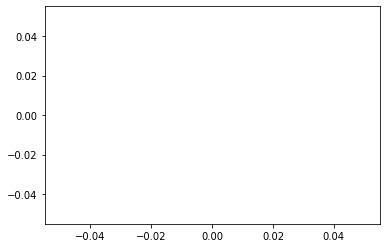

In [13]:
plt.plot([0, 1], [prop(1), prop(2)])

In [65]:
#constellate: ignore

g = {}

exec('''
from scipy import stats
''', g)

exec('''
def prop(x):
    print(globals().keys())
    return stats.norm(loc=x, scale=1).rvs()
''', g)

print(len(g['prop'].__globals__))

from types import ModuleType, FunctionType
mods = {}
for k in list(g.keys()):
    if isinstance(g[k], ModuleType) or k == "__builtins__":
        mods[k] = g.pop(k)

print(len(g['prop'].__globals__))

func_globals = {}

s = mods
print(len(g['prop'].__globals__))
s.update(g)
print(len(s['prop'].__globals__))
print(len(g['prop'].__globals__))

exec('''
print(prop(1))
''', s)


3
3
2
1
1
1
1
1


NameError: name 'print' is not defined